In [2]:
import numpy as np
import random as rnd
import pprint
import matplotlib.pyplot as plt

In [3]:
mindblast = 1/8.5*0.99 #mindblast casts-per-second
death = 1/(12.)*0.75*0.99 #shadow word: death casts-per-second

In [4]:
class ISP:
    def __init__(self):
        self.expiration=0
        self.stacks=0
    def refresh(self,t):
        self.expiration=t+12
        self.stacks=4

In [15]:
class warlock:
    def __init__(self,name,crit,hit,BpS,increment,ISP_talent=5,Bane=5):
        self.name=name
        self.crit_chance=min(1,crit)
        self.hit_chance=min(.16,hit)
        self.ISP_chance=ISP_talent/5.
        self.cast_time=1/BpS
        self.scheduled_attack=self.cast_time-3
        self.next_fire=0
        self.moving_time=-3
    def Cast(self,t,ISP):
        hit=(.83+self.hit_chance)>rnd.random()
        crit=self.crit_chance>rnd.random()
        ISP_hit=True #(.83+self.hit_chance)>rnd.random()
        if hit:
            ISP.stacks-=1
            if crit and ISP_hit:
                ISP.refresh(t)
        self.scheduled_attack=t+self.cast_time
    def Movement(self,kind,t):
        times={'fire':0,'mechanic':0}
        #print times[kind]*(t>0)
        self.scheduled_attack=t+times[kind]*(t>0)+self.cast_time
        self.moving_time+=times[kind]

In [16]:
def battle(fight_length,warlocks,increment,fire_time,mechanic_time):
    t=0
    record=0
    isp=ISP()
    for warlock in warlocks:
        warlock.scheduled_attack=0
    next_mechanic=np.random.normal(mechanic_time[0],mechanic_time[1])
    while t<fight_length:
        if t>=isp.expiration:
            isp.stacks=0
        for W,warlock in enumerate(warlocks):
            if t>=warlock.scheduled_attack:
                warlock.Cast(t,isp)
            if t>=next_mechanic:
                warlock.Movement('mechanic',t)
                if W==len(warlocks)-1:
                    next_mechanic=t+np.random.normal(mechanic_time[0],mechanic_time[1])
            if t>=warlock.next_fire:
                warlock.Movement('fire',t)
                warlock.next_fire=t+np.random.normal(fire_time[0],fire_time[1])
        record+=isp.stacks>0
        t+=increment
    return record

In [17]:
iters=100
increment=0.1
fight_length=300
big_record=[]
hit_value=0.16
hits=[hit_value]*5
h=0.99
crits=[[0.4,0.4,0.4,0.2,0],[0.4,0.4,0.4,0],[0.4,0.4,0.4,0.2,0],
       [0.4,0.4,0.2,0],[0.4,0.4,0.4,0.2,0],[0.4,0.4,0.2,0],
      [0.2,0],[0.2,0],[0.2],[0.2],[0.4,0.2,0],[0.4,0.2,0]]
UA,aff,demo,shad,fire,spriest=0.281,0.307,0.317,0.350,0,mindblast+death
raid=[[shad,shad,shad,UA,spriest],[shad,shad,UA,spriest],[shad,shad,shad,aff,spriest],
      [shad,shad,aff,spriest],[demo,demo,demo,UA,spriest],[demo,demo,aff,spriest],
      [UA,spriest],[aff,spriest],[UA],[aff],[shad,UA,spriest],[demo,UA,spriest]]
mechanic_time=[20,5]
fire_time=[15,5]
for b,BpS in enumerate(raid):
    record=0
    warlocks=[warlock('warlock'+str(n),crits[b][n],hits[n],BpS[n],increment) for n in range(len(crits[b]))]
    for N in range(iters):
        record+=battle(fight_length,warlocks,increment,fire_time,mechanic_time)
    if len(BpS)>1:
        total_bolts=sum(BpS[0:len(BpS)-1])
        c=np.average(crits[b][0:len(crits[b])-1])
        fraction=total_bolts/(total_bolts+BpS[-1])
    else:
        c=warlocks[0].crit_chance
        fraction=1
    theoretical=1-(1-c*h)**(4*fraction)
    actual=record/(iters*fight_length/increment)
    movement_loss=0
    for warloc in warlocks:
        movement_loss+=warloc.moving_time/float(iters)
    big_record.append([len(BpS)-1,actual,theoretical,movement_loss/(fight_length*len(BpS))])
for record in big_record:
    print record

[4, 0.8077033333333333, 0.7769997580522044, -9.999999999999999e-05]
[3, 0.8175866666666667, 0.8184974560041395, -9.999999999999999e-05]
[4, 0.8153066666666666, 0.7777577725989527, -9.999999999999999e-05]
[3, 0.76809, 0.7435672641014706, -9.999999999999999e-05]
[4, 0.7968333333333333, 0.773829989140374, -9.999999999999999e-05]
[3, 0.7315066666666666, 0.7398969909471715, -9.999999999999999e-05]
[1, 0.40048666666666666, 0.4172013048361187, -9.999999999999999e-05]
[1, 0.43898333333333334, 0.42780216104089286, -9.999999999999999e-05]
[0, 0.49248, 0.5862886143839999, -9.999999999999999e-05]
[0, 0.5046533333333333, 0.5862886143839999, -9.999999999999999e-05]
[2, 0.7110166666666666, 0.6667887677398556, -9.999999999999999e-05]
[2, 0.6757833333333333, 0.6623601218171082, -9.999999999999999e-05]


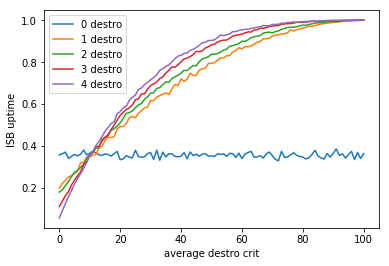

In [25]:
iters=100
increment=0.1
fight_length=180
hit_value=0.16
h=0.99
spriestC=0
affliC=0.2
UA,aff,demo,shad,fire,spriest=0.281,0.307,0.317,0.350,0,mindblast+death
for destro_count in range(0,5):
    actuals=[]
    theoreticals=[]
    BpS=[shad]*destro_count
    BpS.append(affli)
    BpS.append(spriest)
    hits=[hit_value]*(destro_count+2)
    for crit in np.linspace(0,1,101):
        record=0
        crits=[crit]*destro_count
        crits.append(affliC)
        crits.append(spriestC)
        warlocks=[warlock('warlock'+str(n),crits[n],hits[n],BpS[n],increment) for n in range(len(crits))]
        for N in range(iters):
            record+=battle(fight_length,warlocks,increment,(1000,0),(1000,0))
        total_bolts=sum(BpS[0:len(BpS)-1])
        c=np.average(crits[0:len(crits)-1])
        fraction=total_bolts/(total_bolts+BpS[-1])
        theoretical=1-(1-np.average(crits))**(4*fraction)
        actual=record/(iters*fight_length/increment)
        actuals.append(actual)
        theoreticals.append(theoretical)
    plt.plot(actuals,label='{} destro'.format(destro_count))
plt.xlabel('average destro crit')
plt.ylabel('ISB uptime')
plt.legend()
plt.show()

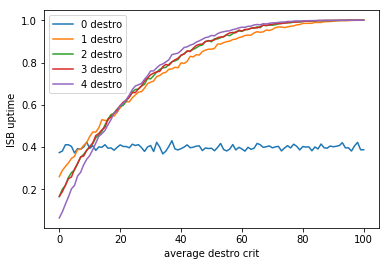

In [26]:
iters=100
increment=0.1
fight_length=180
hit_value=0.16
h=0.99
spriestC=0
affliC=0.2
UA,aff,demo,shad,fire,spriest=0.281,0.307,0.317,0.350,0,mindblast+death
for destro_count in range(0,5):
    actuals=[]
    theoreticals=[]
    BpS=[shad]*destro_count
    #BpS.append(spriest)
    BpS.append(affli)
    hits=[hit_value]*(destro_count+1)
    for crit in np.linspace(0,1,101):
        record=0
        crits=[crit]*destro_count
        #crits.append(spriestC)
        crits.append(affliC)
        warlocks=[warlock('warlock'+str(n),crits[n],hits[n],BpS[n],increment) for n in range(len(crits))]
        for N in range(iters):
            record+=battle(fight_length,warlocks,increment,(1000,0),(1000,0))
        total_bolts=sum(BpS[0:len(BpS)-1])
        c=np.average(crits[0:len(crits)-1])
        fraction=total_bolts/(total_bolts+BpS[-1])
        theoretical=1-(1-np.average(crits))**(4*fraction)
        actual=record/(iters*fight_length/increment)
        actuals.append(actual)
        theoreticals.append(theoretical)
    plt.plot(actuals,label='{} destro'.format(destro_count))
plt.xlabel('average destro crit')
plt.ylabel('ISB uptime')
plt.legend()
plt.show()